<a href="https://colab.research.google.com/github/Yashaswini944/CatBoost-algorithm-implementation/blob/main/CatBoost_algorithm_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 MB 9.0 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Simulated dataset with categorical and numerical features
data = {
    'Education': ['Bachelors', 'Masters', 'PhD', 'Bachelors', 'Masters', 'PhD', 'Bachelors', 'Masters', 'PhD', 'Bachelors'],
    'Experience': [2, 5, 10, 3, 7, 12, 4, 6, 11, 1],
    'Department': ['HR', 'IT', 'Finance', 'Finance', 'HR', 'IT', 'Finance', 'IT', 'HR', 'Finance'],
    'Target': [0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)

In [6]:
# Define features and target
X = df.drop('Target', axis=1)
y = df['Target']

In [7]:
# Identify categorical feature indices
cat_features = [0, 2]  # column indices of 'Education' and 'Department'

In [8]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Initialize and train CatBoost model
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=4, verbose=0)
model.fit(X_train, y_train, cat_features=cat_features)

CatBoostClassifier(depth=4, iterations=100, learning_rate=0.1, verbose=0)

In [10]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


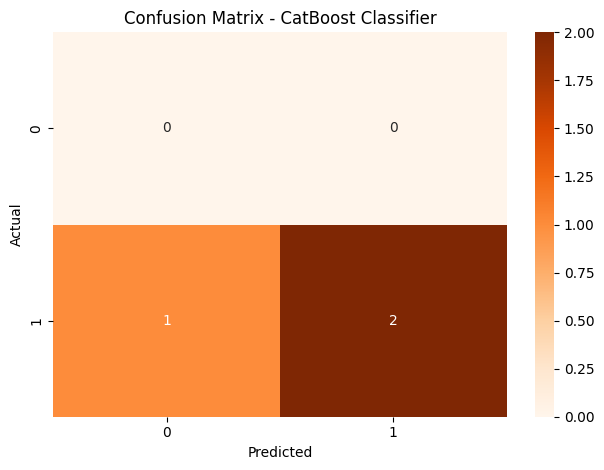

In [11]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - CatBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()